<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Assessment" data-toc-modified-id="Assessment-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Assessment</a></span><ul class="toc-item"><li><span><a href="#Problem" data-toc-modified-id="Problem-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Problem</a></span></li><li><span><a href="#Submission-Guidelines" data-toc-modified-id="Submission-Guidelines-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Submission Guidelines</a></span></li><li><span><a href="#Exploration" data-toc-modified-id="Exploration-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Exploration</a></span></li><li><span><a href="#Solution-Preliminaries" data-toc-modified-id="Solution-Preliminaries-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Solution Preliminaries</a></span><ul class="toc-item"><li><span><a href="#Dummy-Predictor" data-toc-modified-id="Dummy-Predictor-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Dummy Predictor</a></span></li><li><span><a href="#Insufficiently-Good-Predictor:" data-toc-modified-id="Insufficiently-Good-Predictor:-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Insufficiently Good Predictor:</a></span></li><li><span><a href="#Overfitting-Predictor:" data-toc-modified-id="Overfitting-Predictor:-1.4.3"><span class="toc-item-num">1.4.3&nbsp;&nbsp;</span>Overfitting Predictor:</a></span></li></ul></li><li><span><a href="#Your-Solution" data-toc-modified-id="Your-Solution-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Your Solution</a></span></li></ul></li></ul></div>

# Assessment

## Problem

Candidates will be provided with a data set which may be loaded like so:
```
import pandas as pd
df = pd.read_csv('assessment_dsml1_train.csv')
```

The objective is to create a predictor that predicts values of `y` based on given values of `x1` thru `x5`. The passing criteria is to achieve a RMSE of at most 25.

_**Hint**: Data of this sort is reasonably common in marketing and large consumer facing applications. (But seldom is such data as "friendly".)_

_**Hint**: Explore the data and decide on your next move._

_**Hint**: Different clusters may behave differently._

_**Hint**: You may need to do consider clusters separately._

## Submission Guidelines

Submission will be done on [the provided online platform](https://upcode-assessment-platform.meteorapp.space/). Candidates may use their email address as their user name and `<NRIC>_<Mobile Number>` (e.g.: `S1234567Z_91234567`) as their password.

The submission comprises two parts:

 - Quantitative Assessment of Predictors
 - Text Submission of Code and Reasoning
 
For the quantitative assessment, a set of data containing only columns `x1` thru `x5` will be given. The candidate should pass that data through the created predictor and submit the output which will be checked for whether it meets the target RMSE.

For the text/code submission, guidelines (and additional process hints) are provided on the platform itself. But generally speaking, at the top of their code submission, candidates should provide a summary, in comments, of the major steps in the process they went through:

 - Narrate the exploration process
 - Outline observations
 - Describe the selected approach (what and why)
 
Candidates should also (liberally) intersperse their code with descriptions of what they are doing and why. While the quantitative dimension is important, bu
t communicating how one's approach makes sense is crucial to achieving anything from getting work deployed into production to getting recommendations announced in Parliament.

Instructors will read submissions, comment on them and "grade" the overall assignment as complete once both aspects are complete. (Generally, instructors will "sort by" the quantitative part being complete.)

## Exploration

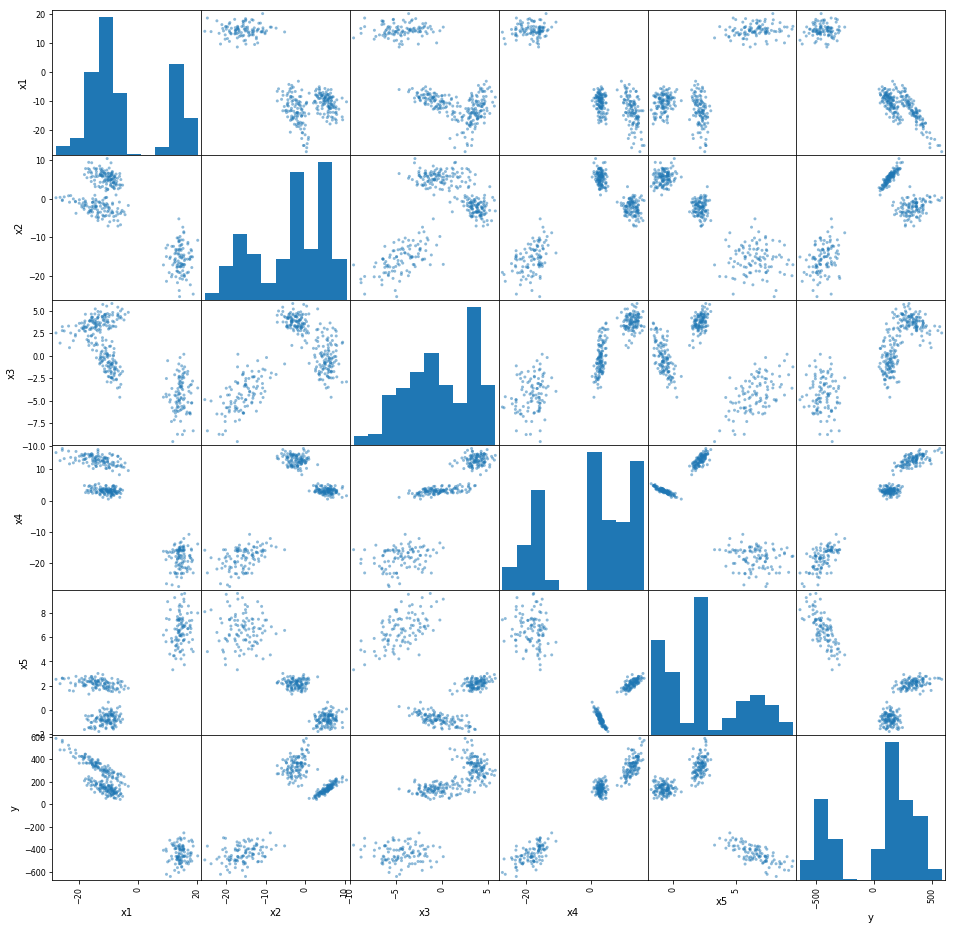

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('assessment_dsml1_train.csv')

X = df[[c for c in df if c != 'y']].values
y = df['y'].values

pd.plotting.scatter_matrix(df, figsize=(16, 16))
plt.show()

In [2]:
df

,x1,x2,x3,x4,x5,y
0,14.402769,-17.673518,-2.874400,-21.071444,7.890294,-527.310172
1,-15.330027,-3.447020,3.758340,14.009959,2.578133,350.330084
2,13.967546,-13.492742,-1.719984,-17.401402,7.523179,-397.975499
3,-8.150049,-4.626950,3.295337,11.341428,1.727920,280.431968
4,-8.626102,7.083813,-2.470631,1.979232,-0.400740,172.258502
5,9.651369,-15.045999,-2.532896,-16.180108,6.588936,-415.807545
6,15.945359,-15.685275,-1.843532,-21.390975,6.911471,-456.648558
7,-14.341646,5.748645,1.998014,5.140238,-1.486959,160.610619
8,-10.589534,4.434447,-1.087493,3.867099,-0.872641,122.621362
9,-5.861518,-6.766921,4.995012,13.312034,2.351040,271.204282


Question: What are the next steps in exploration?

## Solution Preliminaries

We will prepare a function `predict_one` that accepts an array/list corresponding to one input data point and returns a single number as a prediction.

(An alternative is a `predict` function which accepts a list of data points and returns a list of predictions. It's easy to create one from the other:
```python
predict = lambda X: np.array([predict_one(x) for x in X])
```
or
```
predict_one = lambda x: predict([x])[0]
```
We will just talk in terms of `predict_one`.)

### Dummy Predictor

This provides the input/output characteristics of the relevant predictor. It accepts a data point and returns a single prediction. In contrast, `model.predict` methods in scikit-learn accept a list of data points (often expressed as a rectangular array where data points are vertically stacked) and return a list of predictions.

In [3]:
# create something smarter than this

predict_one = lambda x: 42  # example input: [ 14.4, -17.7, -2.9, -21.1, 7.9]
                            # example output: -520

### Insufficiently Good Predictor:

This gets a RMSE of 44 on the training set, so we need to do something smarter.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

print('RMSE (Train): {}'.format(np.sqrt(mean_squared_error(y_train, model.predict(X_train)))))
print('RMSE (Test): {}'.format(np.sqrt(mean_squared_error(y_test, model.predict(X_test)))))

RMSE (Train): 42.084808184434365
RMSE (Test): 53.303481523024026


Your final model should use the entire data set.

In [5]:
model_final = LinearRegression()
model_final.fit(X, y)
predict_one = lambda x: model_final.predict([x])[0]

# but clearly this will not pass

### Overfitting Predictor:

This might get one a great RMSE of 13-ish on the whole training set, but will get a RMSE of around 33 on the (not revealed) evaluation set. This can be verified by splitting the data set for training and evaluation.

So, we really need to do something smarter... and "smarter" is based on what we learn from looking at the data set. (Basically domain knowledge.)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
predict_one = lambda x: model.predict([x])[0]

print('RMSE (Train): {}'.format(np.sqrt(mean_squared_error(y_train, model.predict(X_train)))))
print('RMSE (Test): {}'.format(np.sqrt(mean_squared_error(y_test, model.predict(X_test)))))

RMSE (Train): 15.28728245078108
RMSE (Test): 29.826894939084763


Be wary of small RMSE values when learning and evaluating on the same data.

You might want to play with `sklearn.tree.DecisionTreeRegressor` and tweak parameters like `min_samples_leaf`. It probably still won't work. You need to apply some domain knowledge instead of looking for a magic algorithm.

## Your Solution

Remember, in the comments of your submission:

 - Narrate your exploration process
 - Outline your observations
 - Describe your selected approach (what and why)

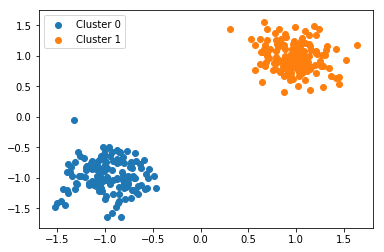

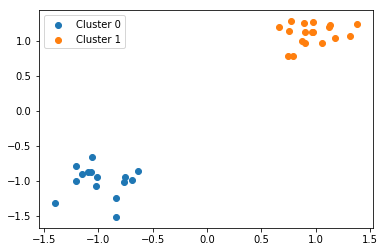

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('assessment_dsml1_train.csv')

X = df[[c for c in df if c != 'y']].values
y = df['y'].values

#to show the data in terms of scatter matrixes: 
    #pd.plotting.scatter_matrix(df, figsize=(16, 16))
    #plt.show()

#to scale the data, then cluster it

import sklearn.preprocessing
from sklearn.datasets import make_blobs


X *= np.array([[1, 10]])
X += np.array([[-30, 10]])

X1 = X[:300, :] #splitting the data into two sets
X2 = X[300:, :]
scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(X1)  # scaler learns the geometry and uses it to "re-scale"...
                # ... (stretch/squeeze/shift) the data
XX1 = scaler.transform(X1)

#plt.scatter(XX1[:,0], XX1[:,1])
#plt.show()

from sklearn.cluster import KMeans
model = KMeans(n_clusters=2)
model.fit(XX1)

for c in set(model.labels_):
    plt.scatter(XX1[model.labels_ == c, 0], XX1[model.labels_ == c, 1], label="Cluster {}".format(c))
plt.legend()
plt.show()

#"testing" the clustering, with the last 10% of the data set.
XX2 = scaler.transform(X2)  # transform using same scaler
y_pred = model.predict(XX2)  # assign labels to "new" data
for c in set(y_pred):
    plt.scatter(XX2[y_pred == c, 0], XX2[y_pred == c, 1], label="Cluster {}".format(c))
plt.legend()
plt.show()

In [44]:
#setting up notebook, importing packages and reading data set
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
df = pd.read_csv('assessment_dsml1_train.csv')

X = df[[c for c in df if c != 'y']].values
y = df['y'].values


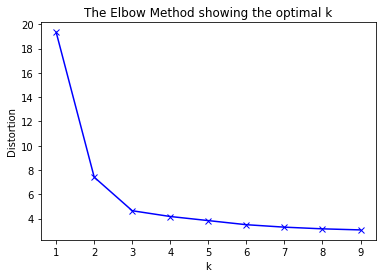

In [45]:
#data exploration to determine optimal number of clusters

# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

#hence, the optimal number of clusters is 3.

In [40]:
#creating predictor
def make_predictor(X, y):
    #ss = sklearn.preprocessing.StandardScaler()
    #X_scaled = ss.fit_transform(X)
    
    X, y  = make_blobs(n_samples=333, centers=2 , random_state=1)

    X *= np.array([[1, 10]])
    X += np.array([[-30, 10]])

    X1 = X[:300, :] #splitting the data into two sets
    X2 = X[300:, :]
    scaler = sklearn.preprocessing.StandardScaler()
    scaler.fit(X1)  # scaler learns the geometry and uses it to "re-scale"...
                    # ... (stretch/squeeze/shift) the data
    XX1 = scaler.transform(X1)
    
    model = sklearn.linear_model.LinearRegression()
    model.fit(XX1, y)

    def predict(x):
        XX1 = ss.transform([x])
        return model.predict(XX1)[0]

    predict = lambda X: np.array([predict_one(x) for x in X])

    return predict_one, predict

import sklearn.model_selection
import sklearn.metrics

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

predict = make_predictor(X_train, y_train)
print('RMSE (train):', np.sqrt(sklearn.metrics.mean_squared_error(y_train, predict(X_train))))
print('RMSE (test):', np.sqrt(sklearn.metrics.mean_squared_error(y_test, predict(X_test))))

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

print('RMSE (Train): {}'.format(np.sqrt(mean_squared_error(y_train, model.predict(X_train)))))
print('RMSE (Test): {}'.format(np.sqrt(mean_squared_error(y_test, model.predict(X_test)))))

ValueError: Found input variables with inconsistent numbers of samples: [300, 333]

In [34]:
df.corr()

,x1,x2,x3,x4,x5,y
x1,1.000000,-0.833327,-0.784041,-0.929381,0.803965,-0.962686
x2,-0.833327,1.000000,0.544950,0.725953,-0.924969,0.769015
x3,-0.784041,0.544950,1.000000,0.882558,-0.461984,0.836241
x4,-0.929381,0.725953,0.882558,1.000000,-0.702700,0.980436
x5,0.803965,-0.924969,-0.461984,-0.702700,1.000000,-0.749696
y,-0.962686,0.769015,0.836241,0.980436,-0.749696,1.000000


In [ ]:
# implementation here

<button data-toggle="collapse" data-target="#process-hint" class='btn btn-primary'>Big Hint on Process (Try things yourself first)</button>
<div id="process-hint" class="collapse">
Here is a skeleton for creating a process that builds predictors from data:
```py
def make_predictor(X, y):
    ss = sklearn.preprocessing.StandardScaler()
    X_scaled = ss.fit_transform(X)

    model = sklearn.linear_model.LinearRegression()
    model.fit(X_scaled, y)
    
    def predict_one(x):
        X_scaled = ss.transform([x])
        return model.predict(X_scaled)[0]
    
    predict = lambda X: np.array([predict_one(x) for x in X])
    
    return predict_one, predict
```

It helps you create predictors from "X-y" data. Whether it is the training set or a full data set. This means there is no need to duplicate code and risk making mistakes.

You can create and test a scheme for making a predictor as follows:
```py
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.33)

predict_one, predict = make_predictor(X_train, y_train)
print('RMSE (train):', np.sqrt(sklearn.metrics.mean_squared_error(y_train, predict(X_train))))
print('RMSE (test):', np.sqrt(sklearn.metrics.mean_squared_error(y_test, predict(X_test))))
```

Tweak `make_predictor` until things work well enough.

Once satisfied, you can use the whole data set to learn a predictor...

```py
predict_one, predict = make_predictor(X, y)
```

... and do the quantitative assessment with

```py
[predict_one(x) for x in X_assess]
```

or

```py
predict(X_assess)
```

Also, be careful about whether you are passing DataFrames/Series or numpy arrays into the various methods you create. While scikit-learn includes code to accommodate different inputs, user code without the same accommodations will run into issues. Note the `for x in X` above. If `X` were a DataFrame, we iterate over the column headings, and if `X` were a numpy array, then we will iterate over the rows.